## Import required packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load the data

In [2]:
bike_data=pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv')
bike_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


## Check the information about data

In [3]:
bike_data.shape

(731, 14)

In [4]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'rentals'],
      dtype='object')

* Season : 1-winter, 2-spring, 3- summer, 4- fall
* year: 0-2011, 1-2012
* workingday: 1- working day, 0- holiday
* weathersit: 1-clear, 2-cloudy, 3-light rain/snow, 4-heavy rain, 
* rentals: numbers of bicycle recorded(output variable)

## Create new column "Day" of the month from "dteday"

In [5]:
bike_data['day']=pd.DatetimeIndex(bike_data['dteday']).day

In [6]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'rentals', 'day'],
      dtype='object')

In [7]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


## Check the info like data type and non null count in each column

In [8]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
 14  day         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


## Statistical measures

In [9]:
bike_numeric=pd.DataFrame(bike_data[['temp','atemp','hum','windspeed','rentals']])
bike_numeric

,temp,atemp,hum,windspeed,rentals
0,0.344167,0.363625,0.805833,0.160446,331
1,0.363478,0.353739,0.696087,0.248539,131
2,0.196364,0.189405,0.437273,0.248309,120
3,0.200000,0.212122,0.590435,0.160296,108
4,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...
726,0.254167,0.226642,0.652917,0.350133,247
727,0.253333,0.255046,0.590000,0.155471,644
728,0.253333,0.242400,0.752917,0.124383,159
729,0.255833,0.231700,0.483333,0.350754,364


In [10]:
bike_numeric.describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


## Check for distribution of data

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


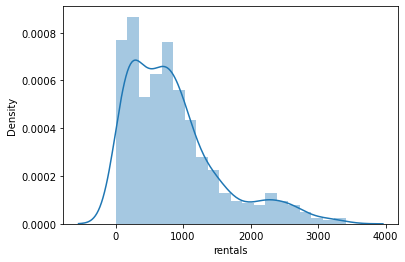

In [11]:
sns.distplot(bike_data['rentals']);

In [12]:
bike_data['rentals'].skew()

1.2664540319434734

In [13]:
bike_data['rentals'].mean()

848.1764705882352

inference:
* here the Skeweness is greater tha 1 then it is highly skewed.
* Data is distributed right side from mean
* Most of the data or the frequency of data is higher in left side so 'Rentals' column is left skewed.

## Check for outliers

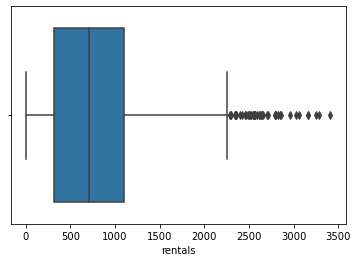

In [14]:
sns.boxplot(x='rentals', data=bike_data);

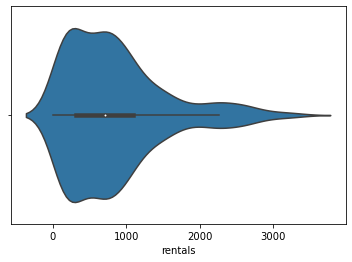

In [15]:
sns.violinplot(x='rentals', data=bike_data);

* Inference: Data is spread towards right of the mean and the outliers are observed.

## Check relation between columns

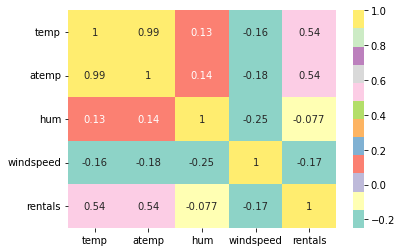

In [16]:
sns.heatmap(bike_numeric.corr(),annot=True, cmap='Set3');

## Check for peakness od data

In [17]:
bike_data.rentals.kurtosis()

1.3220743270907955

## On which date more bike are on rent

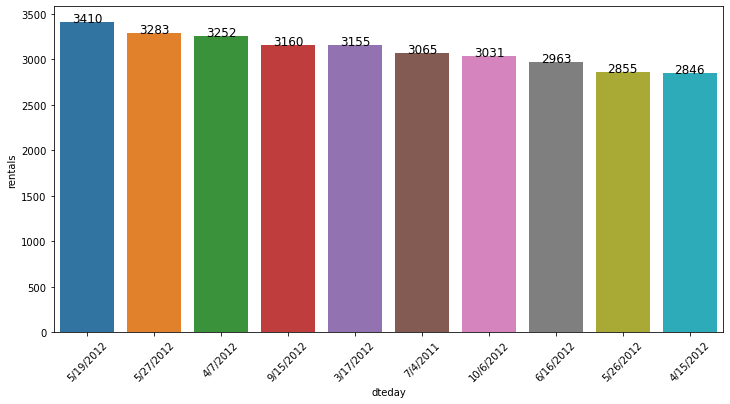

In [18]:
def data_labels(x_list, y_list):
    for i in range(len(x_list)):
        plt.annotate(y_list[i],(i,y_list[i]), ha='center', fontsize=12)
        
plt.figure(figsize=(12,6))
sns.barplot(x='dteday', y='rentals', data=bike_data, ci=None, estimator=sum,
           order=bike_data.groupby('dteday').rentals.sum().sort_values(ascending=False)[:10].index)
plt.xticks(rotation=45)

x=bike_data.groupby('dteday').rentals.sum().sort_values(ascending=False)[:10].index
y=bike_data.groupby('dteday').rentals.sum().sort_values(ascending=False)[:10].values
data_labels(x,y);

* Inference: On date 19-05-2012 more bike are on rent

## On which week day more bikes are on rent

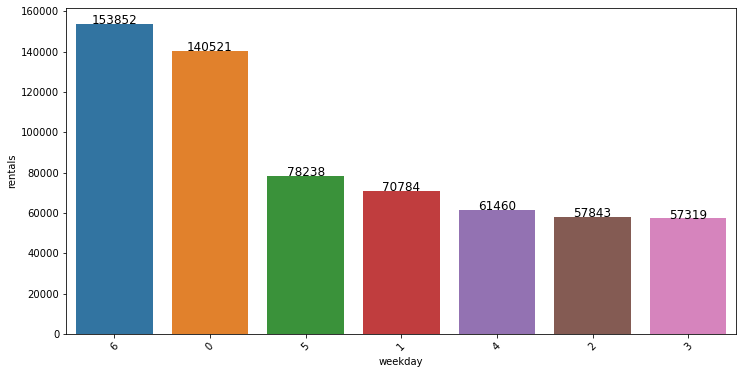

In [19]:
def data_labels(x_list, y_list):
    for i in range(len(x_list)):
        plt.annotate(y_list[i],(i,y_list[i]), ha='center', fontsize=12)
        
plt.figure(figsize=(12,6))
sns.barplot(x='weekday', y='rentals', data=bike_data, ci=None, estimator=sum,
           order=bike_data.groupby('weekday').rentals.sum().sort_values(ascending=False).index)
plt.xticks(rotation=45)

x=bike_data.groupby('weekday').rentals.sum().sort_values(ascending=False)[:10].index
y=bike_data.groupby('weekday').rentals.sum().sort_values(ascending=False)[:10].values
data_labels(x,y);

* Inference: On Saturday more bikes are on rent, followed by Sunday.

## In which month more bikes are on rent

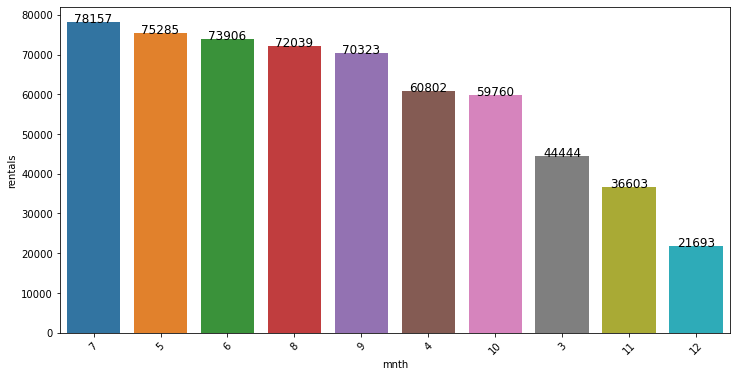

In [20]:
def data_labels(x_list, y_list):
    for i in range(len(x_list)):
        plt.annotate(y_list[i],(i,y_list[i]), ha='center', fontsize=12)
        
plt.figure(figsize=(12,6))
sns.barplot(x='mnth', y='rentals', data=bike_data, ci=None, estimator=sum,
           order=bike_data.groupby('mnth').rentals.sum().sort_values(ascending=False)[:10].index)
plt.xticks(rotation=45)

x=bike_data.groupby('mnth').rentals.sum().sort_values(ascending=False)[:10].index
y=bike_data.groupby('mnth').rentals.sum().sort_values(ascending=False)[:10].values
data_labels(x,y);

* Inference: In month of July more bikes are on rent

## In which weather more bikes are on rent

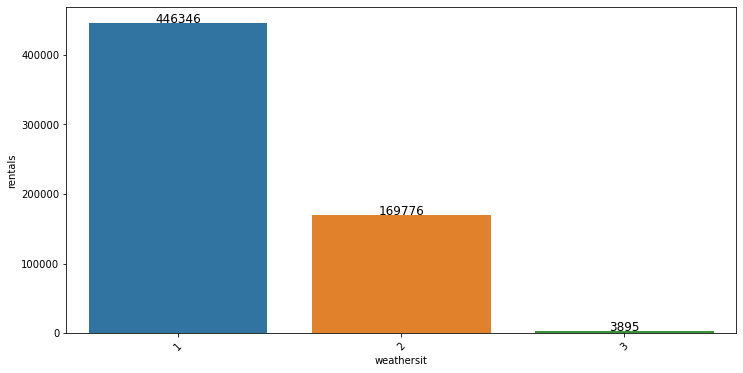

In [21]:
def data_labels(x_list, y_list):
    for i in range(len(x_list)):
        plt.annotate(y_list[i],(i,y_list[i]), ha='center', fontsize=12)
        
plt.figure(figsize=(12,6))
sns.barplot(x='weathersit', y='rentals', data=bike_data, ci=None, estimator=sum,
           order=bike_data.groupby('weathersit').rentals.sum().sort_values(ascending=False)[:10].index)
plt.xticks(rotation=45)

x=bike_data.groupby('weathersit').rentals.sum().sort_values(ascending=False)[:10].index
y=bike_data.groupby('weathersit').rentals.sum().sort_values(ascending=False)[:10].values
data_labels(x,y);

* Inference: here 1 stands for clear weather, 2 for cloudy, 3 for light rain, on clear weather more bikes are on rent

## In which season more bikes are on rent

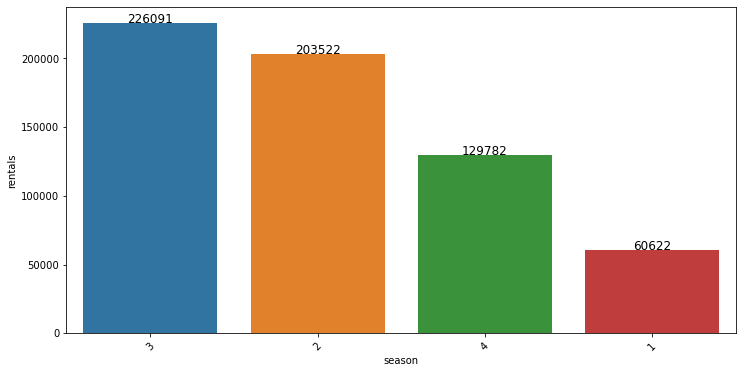

In [22]:
def data_labels(x_list, y_list):
    for i in range(len(x_list)):
        plt.annotate(y_list[i],(i,y_list[i]), ha='center', fontsize=12)
        
plt.figure(figsize=(12,6))
sns.barplot(x='season', y='rentals', data=bike_data, ci=None, estimator=sum,
           order=bike_data.groupby('season').rentals.sum().sort_values(ascending=False)[:10].index)
plt.xticks(rotation=45)

x=bike_data.groupby('season').rentals.sum().sort_values(ascending=False)[:10].index
y=bike_data.groupby('season').rentals.sum().sort_values(ascending=False)[:10].values
data_labels(x,y);

* Inference: here 1 stands for winter, 2 for spring, 3 for summer, 4 for rainfall, clearly in summer season more bikes are rented.

## Seps to create model

### Step-1: Aquire data

X- independent variable
y- output variable

In [24]:
X=bike_data[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']].values
y=bike_data['rentals'].values

In [25]:
X

array([[ 1.      ,  0.      ,  1.      , ...,  0.363625,  0.805833,
         0.160446],
       [ 1.      ,  0.      ,  1.      , ...,  0.353739,  0.696087,
         0.248539],
       [ 1.      ,  0.      ,  1.      , ...,  0.189405,  0.437273,
         0.248309],
       ...,
       [ 1.      ,  1.      , 12.      , ...,  0.2424  ,  0.752917,
         0.124383],
       [ 1.      ,  1.      , 12.      , ...,  0.2317  ,  0.483333,
         0.350754],
       [ 1.      ,  1.      , 12.      , ...,  0.223487,  0.5775  ,
         0.154846]])

In [26]:
y

array([ 331,  131,  120,  108,   82,   88,  148,   68,   54,   41,   43,
         25,   38,   54,  222,  251,  117,    9,   78,   83,   75,   93,
        150,   86,  186,   34,   15,   38,  123,  140,   42,   47,   72,
         61,   88,  100,  354,  120,   64,   53,   47,  149,  288,  397,
        208,  140,  218,  259,  579,  532,  639,  195,   74,  139,  100,
        120,  424,  694,   81,  137,  231,  123,  214,  640,  114,  244,
        316,  191,   46,  247,  724,  982,  359,  289,  321,  424,  884,
       1424, 1047,  401,  460,  203,  166,  300,  981,  472,  222,  317,
        168,  179,  307,  898, 1651,  734,  167,  413,  571,  172,  879,
       1188,  855,  257,  209,  529,  642,  121, 1558,  669,  409,  613,
        745,  177, 1462, 1710,  773,  678,  547,  569,  878, 1965, 1138,
        847,  603,  255,  614,  894, 1612, 1401,  664,  694,  550,  695,
        692,  902, 1582,  773,  678,  536,  735,  909, 2258, 1576,  836,
        659,  740,  758,  871, 2001, 2355, 1549,  6

### Step:2- devide data into train and test in ratio 70:30

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test- Independ variable
y_train, y_test- Dependent variable

In [30]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=0)

# random_state=0, means no shuffling or no changing of data when we run this cell again and again

In [31]:
X_train

array([[ 2.      ,  1.      ,  6.      , ...,  0.597862,  0.467917,
         0.175383],
       [ 1.      ,  0.      ,  1.      , ...,  0.150883,  0.470417,
         0.301   ],
       [ 2.      ,  0.      ,  6.      , ...,  0.678038,  0.654583,
         0.15485 ],
       ...,
       [ 3.      ,  1.      ,  9.      , ...,  0.571971,  0.66875 ,
         0.154229],
       [ 3.      ,  1.      ,  7.      , ...,  0.667933,  0.485833,
         0.08085 ],
       [ 4.      ,  1.      , 11.      , ...,  0.324492,  0.620417,
         0.152987]])

In [32]:
from sklearn.linear_model import LinearRegression

In [34]:
### Creating empty model
model=LinearRegression()
model

LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

Line equation: y=mx+c
x-input
m-slope

in this case we took multiple inputs so m(x1+x2+x3+-----xn)

In [36]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [39]:
prediction=model.predict(X_test)

In [40]:
prediction

array([1777.4707313 , 1060.55926953,  859.57862584, -133.96694604,
        442.98664093,  261.39032921,  369.68649207,  725.05778753,
       1564.3936411 , -119.31892355, -167.28384886, -159.55994377,
        -32.12187815,  884.89539209, 1062.0923784 ,  636.66579926,
        861.56574436, 1594.17470383,  182.02075776,  151.10646268,
       1314.81968078,  909.92838439,  414.45435631, 1642.73967315,
        737.58926084, 1837.44665611, 1323.70957301,  949.82653628,
       1706.87076722, 1804.69319409,  475.6260399 ,  868.10868562,
        570.07164673, 1844.08398298,  -12.27241142, 1271.13371498,
       1248.08727599, 2443.57600095,  297.63228687,  235.03824456,
       1660.57837531,  866.11850069,  811.63209404,  405.61545794,
       1224.85703594,  926.10707721,  750.88020326, 1199.98458995,
       1087.78700126,  830.66817853, 1650.0076994 , 1258.19756093,
        630.59298895,  885.93311193,  814.19454298, 1226.40061213,
        127.35358272,  796.08303464, 1230.91820382,  398.61756

In [41]:
y_test

array([2418,  754,  222,   47,  244,  145,  240,  555, 3252,   38,   47,
        103,  120,  763,  748,  699, 1118, 2090,  109,  401, 1172,  159,
        378, 1467,  196, 1208,  562,  688, 2454, 2795,   54,  783,  601,
       1782,  163,  775, 1036, 1448,  424,   96, 2541,  131,  653,  246,
       1074, 1001,  244, 1236,  384,  472, 2557, 1135,  665, 1173,  799,
        810,  188,  979, 1040,  140, 1340, 1435,  371, 3160, 1038,  118,
        830,  486, 2855,  419, 1026,  975, 1532, 2153,  529,  551,  762,
       1207,  220,  364, 1559, 1201, 1246,  639, 1544, 1563,  812,  667,
       1264,  836,   43,   46, 1259, 1328,  342,  440,   57,  983,  467,
        163,  539, 1014,  329,  780,  155, 1524,  795, 1045, 2347,  107,
       1710,  435,  417,  532,  192,  673,  701,  603,  875, 1208,  120,
        661,  579,  686,  449,  684,   78,  968,  502,  884,  114, 1707,
         74,  676,  467,  982, 2846,  691,  949, 1750, 1120,  878,  747,
        449, 1776, 3410, 1415,  172, 1521,  891, 21

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
mse=mean_squared_error(y_test, prediction)
rmse=np.sqrt(mse)
r2=r2_score(y_test, prediction)

In [49]:
mse

168177.7838609061

In [50]:
rmse

410.0948473961921

In [51]:
r2

0.670298010191025

In [52]:
model.score(X_test, y_test)

0.670298010191025

In [54]:
model.score(X_train, y_train)

0.6894325126245252

**Above is for multiple linear regression

**for simple linear regression use single column

In [55]:
bike_data.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.047990
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,-0.000861
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.002061
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.009157
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.010710
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,-0.000428
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.009907
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.023824
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.024253
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.018286


In [66]:
X=bike_data[['atemp']]
y=bike_data[['rentals']]

In [67]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=0)

In [68]:
### Creating empty model
model1=LinearRegression()
model1

LinearRegression()

In [69]:
model1.fit(X_train, y_train)

LinearRegression()

In [72]:
prediction=model1.predict(X_test)
prediction

array([[1217.28867071],
       [1326.94267233],
       [ 337.15333524],
       [ 306.51392094],
       [ 580.648925  ],
       [ 797.0739087 ],
       [ 808.48416915],
       [ 805.66431435],
       [ 738.73900852],
       [ 281.21869546],
       [ 114.80440058],
       [ 516.54347396],
       [ 568.04079023],
       [1257.18848816],
       [1332.6568261 ],
       [1120.47290402],
       [1053.49120108],
       [ 666.11759599],
       [ 398.38253438],
       [ 701.75604887],
       [1250.03508051],
       [ 324.26772675],
       [ 472.42289785],
       [1228.7079547 ],
       [ 143.4586371 ],
       [1138.98919856],
       [1674.40518056],
       [1156.05947157],
       [ 948.09405227],
       [1054.92143144],
       [  39.51878924],
       [1164.63183015],
       [ 765.77126455],
       [1228.6808841 ],
       [ 629.06695982],
       [ 513.71459563],
       [1445.1329384 ],
       [1593.2317124 ],
       [ 703.1050674 ],
       [ 795.6910519 ],
       [1002.20819378],
       [ 575.435

In [81]:
y_test

,rentals
196,2418
187,754
14,222
31,47
390,244
...,...
391,269
571,1383
306,318
200,644


In [73]:
mse=mean_squared_error(y_test, prediction)
rmse=np.sqrt(mse)
r2=r2_score(y_test, prediction)

In [74]:
mse

372605.7609843818

In [75]:
rmse

610.4144174119593

In [76]:
r2

0.26952979168495894

In [78]:
model1.score(X_test, y_test)

0.26952979168495894

In [80]:
model1.score(X_train, y_train)

0.3076078579046676

In [82]:
model1.intercept_
#this is our b0

array([-222.5585157])

y=b1x+b0
b1-slope
b0-intercept

In [87]:
model1.coef_
# this is our b1

array([[2255.8838385]])

In [89]:
data = {
    'boot_size' : [ 39, 38, 37, 39, 38, 35, 37, 36, 35, 40, 
                    40, 36, 38, 39, 42, 42, 36, 36, 35, 41, 
                    42, 38, 37, 35, 40, 36, 35, 39, 41, 37, 
                    35, 41, 39, 41, 42, 42, 36, 37, 37, 39,
                    42, 35, 36, 41, 41, 41, 39, 39, 35, 39
 ],
    'harness_size': [ 58, 58, 52, 58, 57, 52, 55, 53, 49, 54,
                59, 56, 53, 58, 57, 58, 56, 51, 50, 59,
                59, 59, 55, 50, 55, 52, 53, 54, 61, 56,
                55, 60, 57, 56, 61, 58, 53, 57, 57, 55,
                60, 51, 52, 56, 55, 57, 58, 57, 51, 59
                ]
}
dataset=pd.DataFrame(data)
dataset

,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57
5,35,52
6,37,55
7,36,53
8,35,49
9,40,54


In [92]:
pip install statsmodels

In [94]:
import statsmodels.formula.api as smf

In [97]:
formula="boot_size ~ harness_size"

In [98]:
model=smf.ols(formula=formula, data=dataset)

In [99]:
fitted_model=model.fit()

In [101]:
# slope b1 
fitted_model.params[1]

0.5859254167382713

In [102]:
# intercept b0
fitted_model.params[0]

5.7191098126825874

In [103]:
dir(fitted_model)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k

In [107]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              boot_size   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     63.37
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           2.53e-10
Time:                        18:33:23   Log-Likelihood:                -93.054
No. Observations:                  50   AIC:                             190.1
Df Residuals:                      48   BIC:                             193.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.7191      4.102      1.394      0.170      -2.528      13.966
harness_size     0.5859      0.074      7.960      0.000       0.438       0.734
==============================================================================
Omnibus:                        2.715   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                1.758
Skew:                           0.228   Prob(JB):                        0.415
Kurtosis:                       2.203   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""